# Importamos las librearías

In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.integrate import solve_ivp
import pandas as pd
import pickle

# Creamos la base de datos

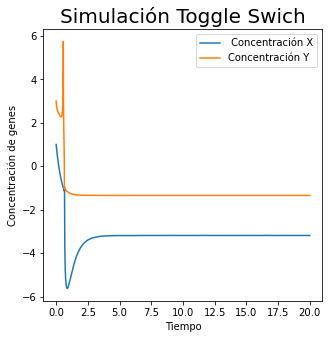

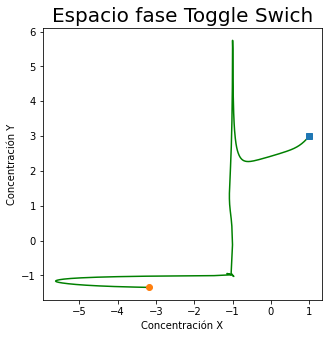

--------------------------------------------


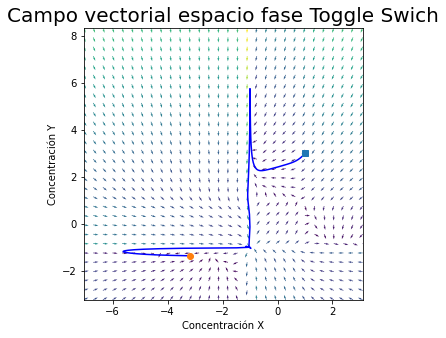

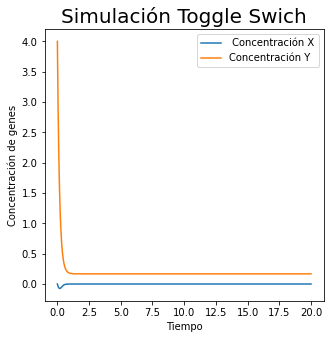

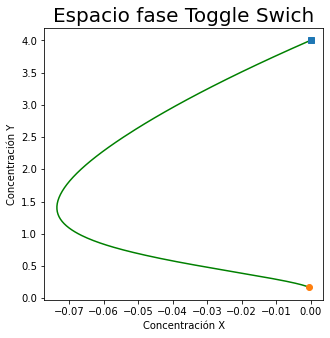

--------------------------------------------


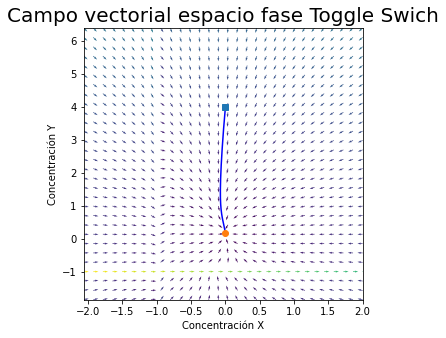

In [76]:
varf = []
campvec = []
coef = []
for i in range (0, 2):
    #constantes
    a1=random.randint(0,10)
    a2=random.randint(0,10)
    b1=random.randint(-10,10)
    b2=random.randint(-10,10)
    d1=random.randint(0,10)
    d2=random.randint(0,10)
    n=random.randint(0,5)
    
    coef1=[a1,a2,b1,b2,d1,d2,n]
    coef.append(coef1)
    def f(t,y):
        
        #asignar a cada ODE a un elemento de vector
        X=y[0]
        Y=y[1]
    
        #definimos cada ODE
        #dX_dt=a1/(1+Y**n)-d1*X+b1
        #dY_dt=a2/(1+X**n)-d2*Y+b2
        dX_dt=a1/(1+Y**n)-d1*X+b1
        dY_dt=a2/(1+X**n)-d2*Y+b1
    
        return [dX_dt,dY_dt]

    #Declaramos el vector de tiempo
    t_span=[0,20]
    times=np.linspace(t_span[0], t_span[1], 7000)
    
    varfci2 = []
    for i_ci in range (0,1):
        #Definimos las condiciones iniciales
        y0=np.array([random.randint(0,10),random.randint(0,10)])

        #Resolvemos
        sol=solve_ivp(f, t_span, y0,t_eval=times) #Modificar manualmente el intervalo de tiempo
        #sol=solve_ivp(f, t_span, y0) #Dejar que la librería elija el mejor intervalo
        tiempo= sol.t
        var1= sol.y[0]
        var2= sol.y[1]

        #Graficamos
        plt.figure(figsize=(5,5))
        plt.plot(tiempo,var1, label=" Concentración X")
        plt.plot(tiempo,var2, label="Concentración Y")
        plt.xlabel('Tiempo')
        plt.ylabel('Concentración de genes')
        plt.title('Simulación Toggle Swich', fontsize=20)
        plt.legend()
        plt.show()

        plt.figure(figsize=(5,5))
        plt.plot(var1,var2, "g")
        plt.plot(var1[0],var2[0],'s') #start
        plt.plot(var1[-1],var2[-1],'o')#end
        plt.xlabel('Concentración X')
        plt.ylabel('Concentración Y')
        plt.title('Espacio fase Toggle Swich', fontsize=20)
        plt.show()
        
        varfci = np.append([var1],[var2], axis = 0)
        varfci2.append(varfci)
        ## Graficamos el campo vectorial

        x_range_neg=min(var1)-2-0.1*min(var1)
        x_range_pos=max(var1)+2+0.1*max(var1)
        y_range_neg=min(var2)-2-0.1*min(var2)
        y_range_pos=max(var2)+2+0.1*max(var2)

        y1 = np.linspace(x_range_neg, x_range_pos, 30)
        y2 = np.linspace(y_range_neg, y_range_pos, 30)

        Y1, Y2 = np.meshgrid(y1, y2)

        t1 = 0

        u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)

        NI, NJ = Y1.shape
        
        u1, v1 = f(t1,[Y1, Y2])
        u,v = f(t1,[Y1, Y2])
        M = (np.hypot(u,v))
        u /= M
        v /= M

        plt.figure(figsize=(5,5))
        plt.plot(sol.y[0], sol.y[1], 'b-') # path
        plt.plot([sol.y[0,0]], [sol.y[1,0]], 's') # start
        plt.plot([sol.y[0,-1]], [sol.y[1,-1]], 'o') # end
        Q = plt.quiver(Y1, Y2, u, v, M, angles='xy')
        plt.title('Campo vectorial espacio fase Toggle Swich', fontsize=20)
        plt.xlim([x_range_neg, x_range_pos])
        plt.ylim([y_range_neg, y_range_pos])
        plt.xlabel('Concentración X')
        plt.ylabel('Concentración Y')
        
    campvecci = np.append([u1],[v1], axis = 0)
    
    varf.append(varfci2)
    campvec.append(campvecci)
    print('--------------------------------------------')

# Comprobamos que los datos se guardaron de manera correcta

In [77]:
np.shape(varf)

(2, 1, 2, 7000)

In [78]:
np.shape(campvec)

(2, 2, 30, 30)

# Volvemos a graficar

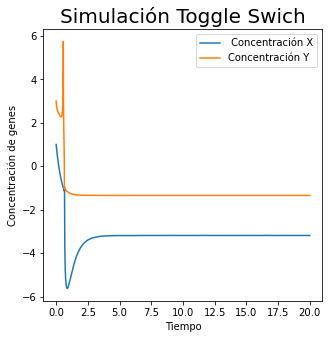

In [79]:
plt.figure(figsize=(5,5))
plt.plot(tiempo,np.array(varf)[0,0,0,:], label=" Concentración X")
plt.plot(tiempo,np.array(varf)[0,0,1,:], label="Concentración Y")
plt.xlabel('Tiempo')
plt.ylabel('Concentración de genes')
plt.title('Simulación Toggle Swich', fontsize=20)
plt.legend()
plt.show()

Text(0, 0.5, 'Concentración Y')

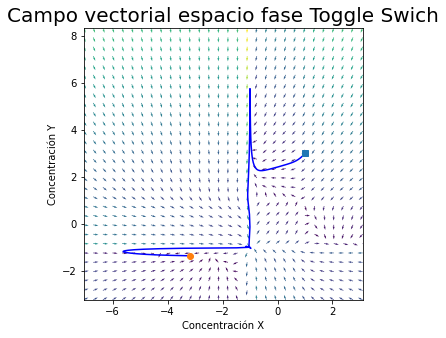

In [80]:
x_range_neg=min(np.array(varf)[0,0,0,:])-2-0.1*min(np.array(varf)[0,0,0,:])
x_range_pos=max(np.array(varf)[0,0,0,:])+2+0.1*max(np.array(varf)[0,0,0,:])
y_range_neg=min(np.array(varf)[0,0,1,:])-2-0.1*min(np.array(varf)[0,0,1,:])
y_range_pos=max(np.array(varf)[0,0,1,:])+2+0.1*max(np.array(varf)[0,0,1,:])

y1 = np.linspace(x_range_neg, x_range_pos, 30)
y2 = np.linspace(y_range_neg, y_range_pos, 30)
Y1, Y2 = np.meshgrid(y1, y2)
t1 = 0
u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)
NI, NJ = Y1.shape        
u,v = np.array(campvec)[0,0,:,:], np.array(campvec)[0,1,:,:]
M = (np.hypot(u,v))
u /= M
v /= M

plt.figure(figsize=(5,5))
plt.plot(np.array(varf)[0,0,0,:],np.array(varf)[0,0,1,:], 'b-') # path
plt.plot(np.array(varf)[0,0,0,0],np.array(varf)[0,0,1,0], 's') # start
plt.plot(np.array(varf)[0,0,0,-1], np.array(varf)[0,0,1,-1], 'o') # end
Q = plt.quiver(Y1, Y2, u, v, M, angles='xy')
plt.title('Campo vectorial espacio fase Toggle Swich', fontsize=20)
plt.xlim([x_range_neg, x_range_pos])
plt.ylim([y_range_neg, y_range_pos])
plt.xlabel('Concentración X')
plt.ylabel('Concentración Y')

In [17]:
M

array([[ 7.65806532,  7.60301289,  7.58603892,  7.61139539,  7.68832587,
         7.84168614,  8.15103686,  8.91394421, 11.14137073, 14.45134576,
        15.09036745, 14.87093966, 12.12743557, 10.27790615,  9.96941194,
        10.11057065, 10.38524619, 10.7122151 , 11.06629225, 11.43790015,
        11.82261535, 12.2179935 , 12.62246207, 13.03488612, 13.45437953,
        13.88021461, 14.31177462, 14.74852634, 15.19000282, 15.63579157],
       [ 6.92000287,  6.85814325,  6.83800983,  6.86396761,  6.94515343,
         7.10597848,  7.42476378,  8.19527896, 10.42032508, 13.72485986,
        14.36857034, 14.15783261, 11.44766493,  9.65162557,  9.38055708,
         9.54811348,  9.84474873, 10.19157023, 10.56417913, 10.95328997,
        11.35460459, 11.76574497, 12.18518377, 12.6118241 , 13.0448157 ,
        13.48346627, 13.92719418, 14.37550091, 14.8279535 , 15.28417246],
       [ 6.18470878,  6.1142798 ,  6.09007325,  6.11663645,  6.20295844,
         6.37281817,  6.70284134,  7.48186471,  9

In [19]:
c=np.sqrt(u1**2+v1**2)

In [20]:
c == M

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [ True,  True,  True,

In [21]:
np.shape(coef)

(4, 7)